### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [148]:
data = pd.read_csv('data/coupons.csv')
og_data = data.copy()

In [149]:
data.tail(60)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1
12625,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
12626,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,0
12627,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,1,0,1,1
12628,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,1,0,0
12629,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1
12630,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,0,1,1
12631,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1
12632,Work,Alone,Snowy,30,7AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,1,0,1,0
12633,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [150]:
data[['maritalStatus'         
,'has_children'           
,'education'             
,'occupation'            
,'income'                
,'car' 
,'Bar']].head(60)       

,maritalStatus,has_children,education,occupation,income,car,Bar
0,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
1,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
2,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
3,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
4,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
5,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
6,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
7,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
8,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
9,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never


3. Decide what to do about your missing data -- drop, replace, other...

In [151]:
# Replaces 0 for no and 1 for yes, replace 50 plus with a random # between 50-70, replaced below21 with random # between 18-21
for col in ['has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp','Y']:
    data[col] = data[col].replace({0:'no',1:'yes'})
data['age'] = data['age'].replace({'50plus':random.randint(50,70),'below21':random.randint(18,21)})
data['coupon'] = data['coupon'].replace({'Restaurant(<20)':'RestaurantLess20','Restaurant(20-50)':"Restaurant20To50"})
data['coupon'] = data['coupon'].str.split().str[0]
data['age'] = pd.to_numeric(data["age"])


In [152]:
# Clean up categorical nulls with NA which can be handled later
categorical_cols = ['gender', 'maritalStatus', 'education','expiration', 'weather','passanger','car','coupon','occupation','income','RestaurantLessThan20','destination','Restaurant20To50','CoffeeHouse','CarryAway','Bar']
for col in categorical_cols:
    data[col] = data[col].fillna('NA')
# Replaced numerical data null values with median
numerical_cols = ['age' ,'temperature'] 
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [153]:
# Get the different types of coupons
uniques=[]
for val in data['coupon']:
    if val.split(' ')[0] not in uniques:
        uniques.append(val.split(' ')[0])
print(uniques)

['RestaurantLess20', 'Coffee', 'Carry', 'Bar', 'Restaurant20To50']


In [154]:
# Split the main dataframe into 5, one dataframe for every unique type of coupon
dataframes = {value: pd.DataFrame() for value in uniques}
for value in uniques:
    dataframes[value] = data[data['coupon'] == value]

4. What proportion of the total observations chose to accept the coupon? 



In [155]:
def proportion_accepts(data): 
    accepts = data['Y'].value_counts()['yes']
    denies = data['Y'].value_counts()['no']
    total = len(data)
    total_same = accepts+denies == total
    if total_same:
        proportion = accepts/total
        print(f"Proportion of accepts/total is {round(proportion,3)} or {round(proportion,4)*100}%")
        return round(proportion,3)
    else:
        print('Proportion is not the same, check data for completeness')
    
accepts = proportion_accepts(data)

Proportion of accepts/total is 0.568 or 56.84%


5. Use a bar plot to visualize the `coupon` column.

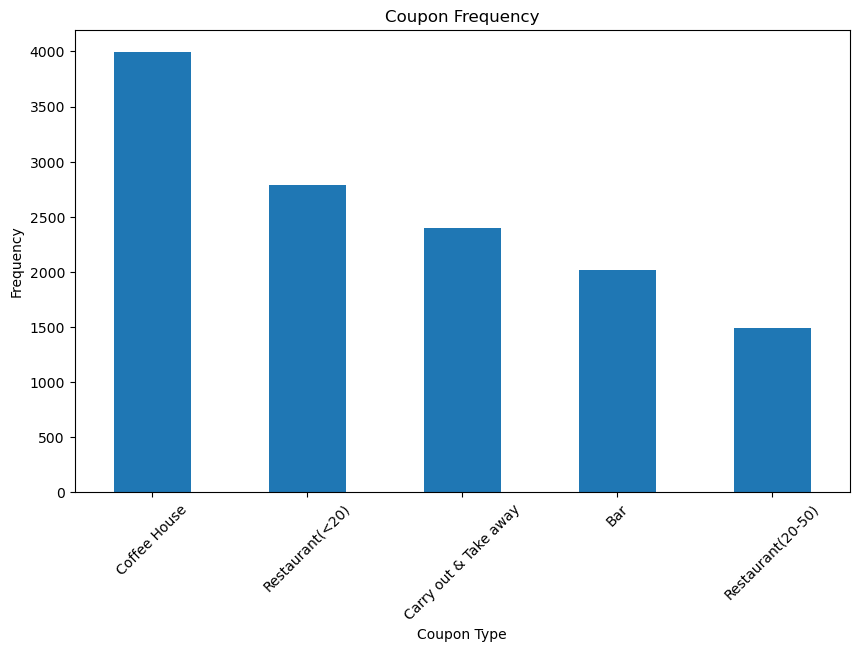

In [156]:
# Count the frequency of each unique value in the 'coupon' column
coupon_counts = og_data['coupon'].value_counts()

# Plot
plt.figure(figsize=(10,6))
coupon_counts.plot(kind='bar')
plt.title('Coupon Frequency')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

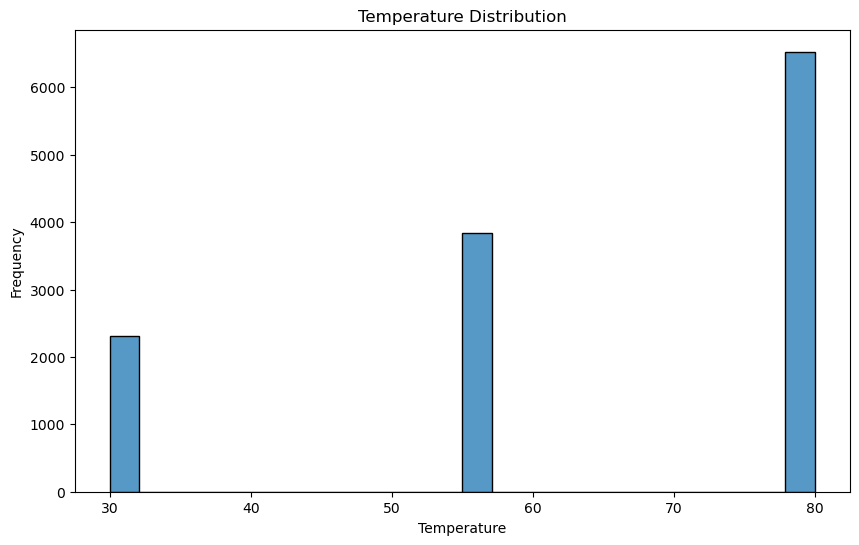

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], kde=False, bins='auto', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [158]:
bar_df = dataframes['Bar']
bar_df = bar_df[bar_df['Bar'] != 'NA']

2. What proportion of bar coupons were accepted?


In [159]:
bar_accepts = proportion_accepts(bar_df)

Proportion of accepts/total is 0.41 or 41.03%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [160]:
fewerThan3 = bar_df[bar_df['Bar'].isin(['never', '1~3','less1'])]
moreThan3 = bar_df[~bar_df['Bar'].isin(['never', '1~3','less1'])]
print(f'Fewer than 3 times a month acceptance rate: {str(proportion_accepts(fewerThan3))}' + '\n')
print(f'More than 3 times a month acceptance rate: {str(proportion_accepts(moreThan3))}')

Proportion of accepts/total is 0.371 or 37.059999999999995%
Fewer than 3 times a month acceptance rate: 0.371

Proportion of accepts/total is 0.769 or 76.88000000000001%
More than 3 times a month acceptance rate: 0.769


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [161]:
moreThan1Under25 = bar_df[~bar_df['Bar'].isin(['never','less1'])]
moreThan1Under25 = moreThan1Under25[moreThan1Under25['age'] > 25]
print(f'More than 1 time a month and under 25 y/o acceptance rate is high: {str(proportion_accepts(moreThan1Under25))}')

Proportion of accepts/total is 0.695 or 69.52000000000001%
More than 1 time a month and under 25 y/o acceptance rate is high: 0.695


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [162]:
specific_df = bar_df[~bar_df['Bar'].isin(['never','less1']) & (bar_df['passanger'] != 'Kid(s)')]
specific_df = specific_df[specific_df['occupation'] != 'Farming Fishing & Forestry']
print(f'More than 1 time a month, with kids, not a farmer, fisher, or forester is a high rate {str(proportion_accepts(specific_df))}')

Proportion of accepts/total is 0.713 or 71.32%
More than 1 time a month, with kids, not a farmer, fisher, or forester is a high rate 0.713


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [177]:
print(bar_df['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [164]:
df1 = bar_df[(~bar_df['Bar'].isin(['never','less1'])) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed')]
print(f'Bars > once a month, not with kids, not widowed is a high rate {str(proportion_accepts(df1))}\n')

df2 = bar_df[(~bar_df['Bar'].isin(['never','less1'])) & (bar_df['age'] < 30)]
print(f'Bars > once a month, age < 30 is a high rate {str(proportion_accepts(df2))}\n')

df3 = bar_df[(~bar_df['RestaurantLessThan20'].isin(['never', '1~3','less1'])) & (bar_df['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
print(f'Restaurants > 4 times a month, income < 50K is a low rate {str(proportion_accepts(df3))}')


Proportion of accepts/total is 0.713 or 71.32%
Bars > once a month, not with kids, not widowed is a high rate 0.713

Proportion of accepts/total is 0.722 or 72.17%
Bars > once a month, age < 30 is a high rate 0.722

Proportion of accepts/total is 0.463 or 46.29%
Restaurants > 4 times a month, income < 50K is a low rate 0.463


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [165]:
# Printed hypothesis
print('\nHypothesis is that drivers who go to bars more than once a month are fairly likely to take a bar coupon. Lower income or having a kid are both indications that a driver wont take the coupon. Drivers who go to a bar more than 3 times a month are among the most likely to take the coupon.')


Hypothesis is that drivers who go to bars more than once a month are fairly likely to take a bar coupon. Lower income or having a kid are both indications that a driver wont take the coupon. Drivers who go to a bar more than 3 times a month are among the most likely to take the coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [166]:
niceRestaurants = dataframes['Restaurant20To50']
niceRestaurants = niceRestaurants[niceRestaurants['Restaurant20To50'] != 'NA']

In [170]:
nice_rest_accepts= proportion_accepts(niceRestaurants)

Proportion of accepts/total is 0.443 or 44.29%


In [172]:
fewerThan3 = niceRestaurants[niceRestaurants['Restaurant20To50'].isin(['never', '1~3','less1'])]
moreThan3 = niceRestaurants[~niceRestaurants['Restaurant20To50'].isin(['never', '1~3','less1'])]
print(f'Fewer than 3 times a month acceptance rate: {str(proportion_accepts(fewerThan3))}' + '\n')
print(f'More than 3 times a month acceptance rate: {str(proportion_accepts(moreThan3))}')

Proportion of accepts/total is 0.425 or 42.46%
Fewer than 3 times a month acceptance rate: 0.425

Proportion of accepts/total is 0.642 or 64.23%
More than 3 times a month acceptance rate: 0.642


In [184]:
low_income_df = niceRestaurants[niceRestaurants['income'].isin(['Less than $12500','$12500 - $24999'])]
high_income_df = niceRestaurants[~niceRestaurants['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])]
very_high_income_df =  niceRestaurants[niceRestaurants['income'].isin(['$100000 or More'])]
print(f'Low income acceptance rate: {str(proportion_accepts(low_income_df))}' + '\n')
print(f'High income acceptance rate: {str(proportion_accepts(very_high_income_df))}')

Proportion of accepts/total is 0.372 or 37.15%
Low income acceptance rate: 0.372

Proportion of accepts/total is 0.495 or 49.51%
High income acceptance rate: 0.495


In [215]:
young_df = niceRestaurants[niceRestaurants['age'] < 30]
mid_df = niceRestaurants[(niceRestaurants['age'] >= 30) & (niceRestaurants['age'] < 60) ]

older_df = niceRestaurants[niceRestaurants['age'] >= 60]

print(f"Younger than 30 acceptance rate: {proportion_accepts(young_df)}\n")
print(f"30 to 60 acceptance rate: {proportion_accepts(mid_df)}\n")
print(f"60 and older acceptance rate: {proportion_accepts(older_df)}")

Proportion of accepts/total is 0.466 or 46.56%
Younger than 30 acceptance rate: 0.466

Proportion of accepts/total is 0.45 or 45.01%
30 to 60 acceptance rate: 0.45

Proportion of accepts/total is 0.356 or 35.620000000000005%
60 and older acceptance rate: 0.356


In [204]:
print(niceRestaurants['passanger'].unique())

['Alone' 'Partner' 'Friend(s)' 'Kid(s)']


In [222]:
spouse_passenger_df = niceRestaurants[(niceRestaurants['passanger'] == 'Partner') & (niceRestaurants['age'] < 30) & (~niceRestaurants['Restaurant20To50'].isin(['never','less1']))]

print(f"Spouse as passenger and goes more than once a month acceptance rate: {proportion_accepts(spouse_passenger_df)}")

Proportion of accepts/total is 0.783 or 78.25999999999999%
Spouse as passenger and goes more than once a month acceptance rate: 0.783


In [230]:
# Checking if lowering age makes the highest found rate higher
spouse_passenger_df = spouse_passenger_df[spouse_passenger_df['age'] < 30]
print(f"Younger drivers with low income acceptance rate: {proportion_accepts(spouse_passenger_df)}\n")

# Checking if not having partner in car and going to nice restaurants less than once a month makes lowest  rate lower
older_with_spouse_df = older_df[(older_df['passanger'] != 'Partner') & (older_df['Restaurant20To50'].isin(['never','less1']))]
print(f"Older drivers without a spouse as a passenger acceptance rate: {proportion_accepts(older_with_spouse_df)}")

Proportion of accepts/total is 0.783 or 78.25999999999999%
Younger drivers with low income acceptance rate: 0.783

Proportion of accepts/total is 0.282 or 28.17%
Older drivers without a spouse as a passenger acceptance rate: 0.282


In [231]:
# Printed analysis
print('It seems as though amongst the lowest rates found for accepting a coupon for a nice restaurant in the $20 to $50 would be drivers who are older, are not sitting with their partner, and go to these kinds of restaurants less than once a month. The highest rates of acceptance were found in drivers that were sitting next to their partners in the car, frequent these restaurants, and are under the age 30. Income seemed to not have the highest effect on the acceptance rate, only changing it from 37% for low income to 49% for high income.')

It seems as though amongst the lowest rates found for accepting a coupon for a nice restaurant in the $20 to $50 would be drivers who are older, are not sitting with their partner, and go to these kinds of restaurants less than once a month. The highest rates of acceptance were found in drivers that were sitting next to their partners in the car, frequent these restaurants, and are under the age 30. Income seemed to not have the highest effect on the acceptance rate, only changing it from 37% for low income to 49% for high income.
